<a href="https://colab.research.google.com/github/Joshuaiwuoha/Hamoye_-projects/blob/main/hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/train_v2.csv/train_v2.csv')

In [4]:
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
labels = df_train['tags'].apply(lambda x: x.split(' '))
from collections import Counter, defaultdict
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1

data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-label-dist')

In [6]:
# for f, l in df_train[:9].values:
#     img_path = '/content/drive/MyDrive/Torrent/train-jpg/{}.jpg'.format(f)
#     print("Trying to read:", img_path)
#     img = cv2.imread(img_path)

#     if img is None:
#         print("Failed to read:", img_path)
#     else:
#         ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#         ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
#         ax[i // 3, i % 3].set_xticks([])  # Hide x-axis ticks
#         ax[i // 3, i % 3].set_yticks([])  # Hide y-axis ticks
#         i += 1


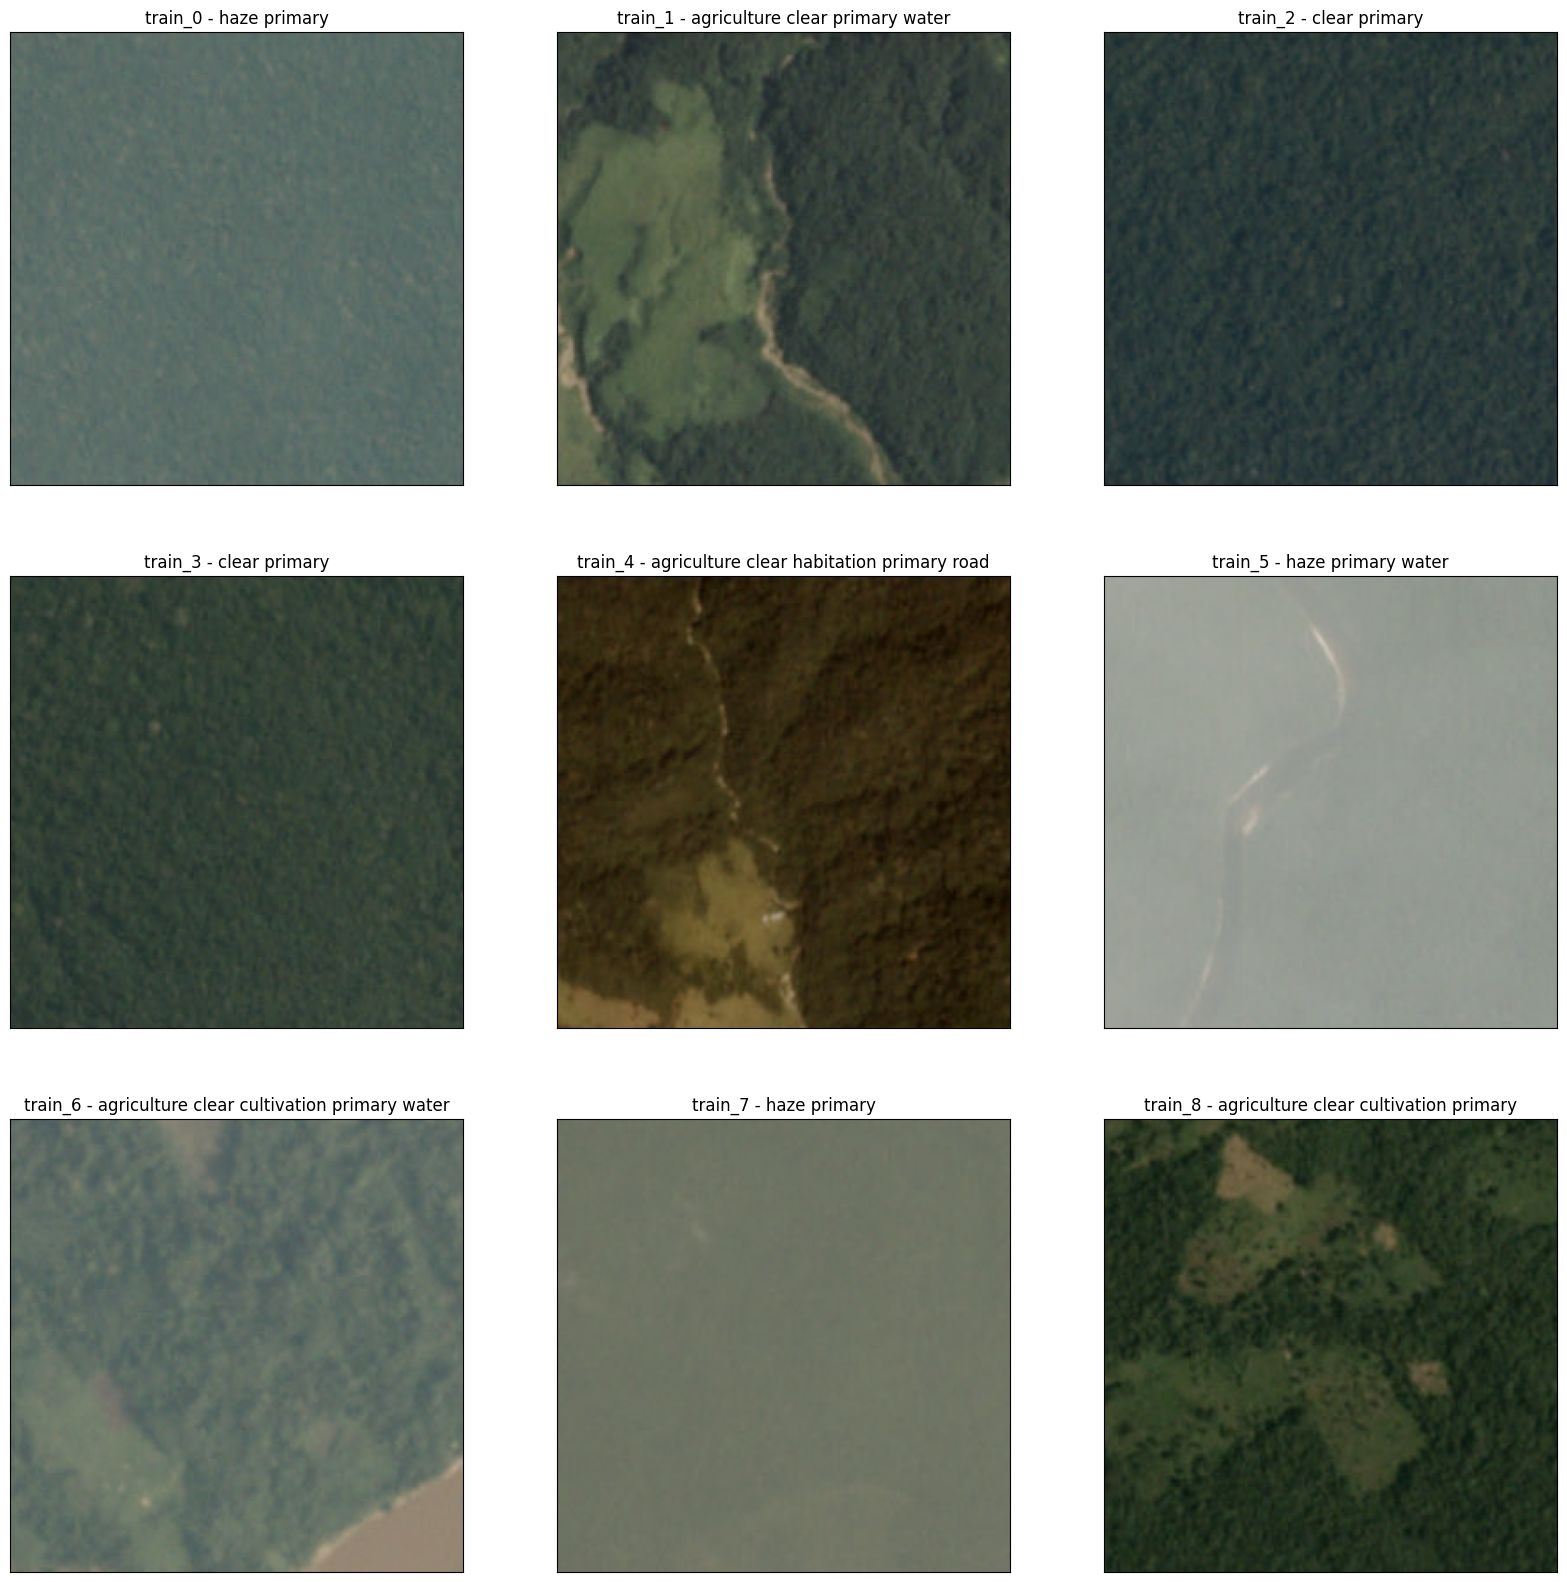

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
i = 0

for f, l in df_train[:9].values:

    img_path = '/content/drive/MyDrive/Torrent/train-jpg/{}.jpg'.format(f)
    try:
        img = Image.open(img_path)
        ax[i // 3, i % 3].imshow(img)
        ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
        ax[i // 3, i % 3].set_xticks([])  # Hide x-axis ticks
        ax[i // 3, i % 3].set_yticks([])  # Hide y-axis ticks
        i += 1
    except Exception as e:
        print("Error reading {}: {}".format(img_path, str(e)))

plt.show()


In [12]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc

import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import cv2
from tqdm import tqdm

x_train = []
x_test = []
y_train = []

# df_train = pd.read_csv('../input/train.csv')

flatten = lambda l: [item for sublist in l for item in sublist]
labels = list(set(flatten([l.split(' ') for l in df_train['tags'].values])))

label_map = {l: i for i, l in enumerate(labels)}
inv_label_map = {i: l for l, i in label_map.items()}

for f, tags in tqdm(df_train.values, miniters=1000):
    img = cv2.imread('/content/drive/MyDrive/Torrent/train-jpg/{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1
    x_train.append(cv2.resize(img, (32, 32)))
    y_train.append(targets)

y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float16) / 255.

print(x_train.shape)
print(y_train.shape)

split = 35000
x_train, x_valid, y_train, y_valid = x_train[:split], x_train[split:], y_train[:split], y_train[split:]

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))

model.compile(loss='binary_crossentropy', # We NEED binary here, since categorical_crossentropy l1 norms the output before calculating loss.
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=4,
          verbose=1,
          validation_data=(x_valid, y_valid))

from sklearn.metrics import fbeta_score

p_valid = model.predict(x_valid, batch_size=128)
print(y_valid)
print(p_valid)
print(fbeta_score(y_valid, np.array(p_valid) > 0.2, beta=2, average='samples'))

 50%|████▉     | 20090/40479 [58:30<59:22,  5.72it/s]  


KeyboardInterrupt: ignored